In [1]:
from Bio import SeqIO
from Bio.SeqUtils import GC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import collections
from scipy.stats import entropy
import pysam
import glob
%matplotlib inline

In [2]:
supercontigs = snakemake.input.fasta

bamfiles = snakemake.input.bams


In [4]:
seq_objects=SeqIO.parse(supercontigs,'fasta')
sequences=[]
for seq in seq_objects:
    sequences.append(seq)

num_of_contigs = len(sequences)

In [5]:
contig_id = []
contig_length = []
for record in sequences:
    record_id = record.id
    sequence = record.seq
    length=len(sequence)
    contig_id.append(record_id)
    contig_length.append(length)
    


In [6]:
# samfile = pysam.AlignmentFile(sampath, "rb")
# iter = samfile.fetch(contig_id[66], 0, contig_length[66])
# for x in iter:
#     print(str(x))
# print(contig_length[64],contig_id[64])

chr21|Seed=6-4025637	67	67	0	60	21S129M	67	161	129	CCCTGACCCCTTGCCCCTGGCCAGGGAGAAGGGAGGCGCTCCCACTGGGCCCCGCTCACCGTTCCCGAGTGGAAGGCGCTGCTGCTCTGCGCTGCTCTCCGGCTTCTTGGGGGGCTTGGCCTTCAGTTGAGAGCCTGAATGGGGGAGCTG	array('B', [34, 34, 28, 38, 34, 38, 38, 38, 38, 38, 38, 38, 38, 41, 41, 38, 41, 41, 41, 41, 38, 41, 34, 41, 28, 16, 41, 38, 7, 38, 38, 41, 38, 38, 41, 41, 34, 16, 41, 38, 41, 38, 41, 34, 41, 41, 38, 38, 41, 41, 41, 23, 41, 41, 41, 41, 41, 38, 23, 41, 38, 34, 41, 38, 38, 38, 34, 38, 38, 38, 41, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 34, 34, 38, 38, 34, 38, 38, 38, 34, 38, 28, 38, 38, 38, 38, 41, 38, 34, 34, 34, 38, 38, 38, 38, 38, 34, 38, 38, 38, 38, 34, 38, 34, 38, 23, 38, 34, 38, 38, 38, 34, 23, 38, 28, 38, 34, 38, 38, 38, 38, 38, 34, 38, 34, 28, 38, 38, 38, 34, 38, 38, 34, 38, 38, 23])	[('NM', 0), ('MD', '129'), ('MC', '150M'), ('AS', 129), ('XS', 0)]
chr21|Seed=5-2671264	179	67	1	60	150M	67	229	150	AGGGAGAAGGGAGGCGCTCCCACTGGGCCCCGCTCACCGTTCCCGAGTGGAAGGCGCTGCTGCTCTGCGC

In [7]:
# iter = samfile.pileup(contig_id[29], 0, contig_length[29])
# for x in iter:
#    print(str(x))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
sample_names = []
bp_per_sample=[]
sample_coverage = []

for fp in bamfiles:
    folder_path = os.path.dirname(fp)
    folder = os.path.basename(folder_path)
    sample_names.append(folder)
    base_pos = []
    coverage = []
    bamfile = pysam.AlignmentFile(fp, "rb")
    for pileupcolumn in bamfile.pileup(contig_id[29], 0, contig_length[29]):
        print ("\ncoverage at base %s = %s" %
               (pileupcolumn.pos, pileupcolumn.n))
        base_pos.append(pileupcolumn.pos)
        coverage.append(pileupcolumn.n)
#    cov_data = {'Base_Pos':base_pos,'Coverage':coverage}
#    df_coverage = pd.DataFrame(cov_data)
#    max_pos = df_coverage.iloc[-1]
#    max_pos = max_pos['Base_Pos']
#    df_coverage = df_coverage.loc[df_coverage['Base_Pos'].between(150, max_pos-150, inclusive=True)]
#     print(df_coverage)
    print(folder)
#    print(df_coverage['Coverage'].mean())
#    print(df_coverage['Coverage'].std())
#     bp_per_sample.append(base_pos)
#     sample_coverage.append(coverage)
    
# print(sample_coverage)



coverage at base 0 = 2

coverage at base 1 = 2

coverage at base 2 = 2

coverage at base 3 = 2

coverage at base 4 = 2

coverage at base 5 = 2

coverage at base 6 = 2

coverage at base 7 = 2

coverage at base 8 = 2

coverage at base 9 = 2

coverage at base 10 = 2

coverage at base 11 = 2

coverage at base 12 = 2

coverage at base 13 = 2

coverage at base 14 = 2

coverage at base 15 = 2

coverage at base 16 = 2

coverage at base 17 = 2

coverage at base 18 = 2

coverage at base 19 = 2

coverage at base 20 = 2

coverage at base 21 = 2

coverage at base 22 = 2

coverage at base 23 = 2

coverage at base 24 = 2

coverage at base 25 = 2

coverage at base 26 = 2

coverage at base 27 = 2

coverage at base 28 = 2

coverage at base 29 = 3

coverage at base 30 = 3

coverage at base 31 = 4

coverage at base 32 = 4

coverage at base 33 = 4

coverage at base 34 = 4

coverage at base 35 = 4

coverage at base 36 = 4

coverage at base 37 = 4

coverage at base 38 = 4

coverage at base 39 = 4

coverage 

coverage at base 289 = 15

coverage at base 290 = 15

coverage at base 291 = 15

coverage at base 292 = 15

coverage at base 293 = 15

coverage at base 294 = 16

coverage at base 295 = 16

coverage at base 296 = 16

coverage at base 297 = 16

coverage at base 298 = 16

coverage at base 299 = 16

coverage at base 300 = 17

coverage at base 301 = 17

coverage at base 302 = 17

coverage at base 303 = 17

coverage at base 304 = 17

coverage at base 305 = 17

coverage at base 306 = 17

coverage at base 307 = 18

coverage at base 308 = 18

coverage at base 309 = 18

coverage at base 310 = 18

coverage at base 311 = 18

coverage at base 312 = 18

coverage at base 313 = 18

coverage at base 314 = 18

coverage at base 315 = 18

coverage at base 316 = 18

coverage at base 317 = 18

coverage at base 318 = 17

coverage at base 319 = 17

coverage at base 320 = 18

coverage at base 321 = 18

coverage at base 322 = 18

coverage at base 323 = 18

coverage at base 324 = 17

coverage at base 325 = 17

c

In [9]:
# df_coverage = pd.DataFrame(sample_lengths)

NameError: name 'sample_lengths' is not defined

In [9]:
sample_names = []
reads_per_sample=[]
sample_lengths = []
for fp in bamfiles:   
    folder_path = os.path.dirname(fp)
    folder = os.path.basename(folder_path)
    sample_names.append(folder)
    reads_mapped = []
    read_lengths = []
    bamfile = pysam.AlignmentFile(fp, "rb")
    for n in range(num_of_contigs):
        iter = bamfile.fetch(contig_id[n], 0, contig_length[n])
        count=0
        for x in iter:
            count += 1
#         if contig_id[n] == "contig_19":
#             print(contig_id[n],count,folder,contig_length[n])
        count = count/contig_length[n]*150
        reads_mapped.append(count)
        read_lengths.append(contig_length[n])
    reads_per_sample.append(reads_mapped)
    sample_lengths.append(read_lengths)
    


In [10]:
df_sort = pd.DataFrame(sample_lengths)
df_sort = df_sort.transpose()
df_sort['contigs']=contig_id
# df_sort.set_index('contigs', inplace=True)
# df_sort.columns = sample_names
df_sort = df_sort.sort_values(0)
order_by_length = df_sort['contigs'].tolist()

In [24]:
# df = pd.DataFrame()
df = pd.DataFrame(reads_per_sample)
df = df.transpose()
df['contigs']=contig_id
df.set_index('contigs', inplace=True)
df.columns = sample_names
df = df.transpose()
df_sorted = df.reindex(columns=order_by_length)
df_sorted

contigs  contig_124  contig_230  contig_199  contig_177  contig_68  \
S0001      2.650177    0.000000    5.244755    4.703833   0.000000   
S0002      9.010601    0.000000    7.342657    8.362369   7.601351   
S0003      2.120141    4.195804    0.000000    0.000000   0.000000   

contigs  contig_210  contig_145  contig_228  contig_39  contig_110  ...  \
S0001      0.000000     0.00000    1.973684   0.000000    6.774194  ...   
S0002      0.000000     9.90099    1.973684   6.796117    0.000000  ...   
S0003      5.016722     0.00000    6.414474   5.825243    2.419355  ...   

contigs  contig_70  contig_105  contig_44  contig_251  contig_178  contig_114  \
S0001     0.000000   12.262460  28.214665    0.000000    0.000000    0.000000   
S0002    12.984914   13.714593  24.388948    0.000000    0.000000   16.470962   
S0003     0.000000   15.328075  13.496281   13.116474   15.251678    0.000000   

contigs  contig_22  contig_43  contig_67  contig_179  
S0001    13.158710   0.000000  26.093710    0.000000  
S0002    14.832610  28.584906  13.357494   14.237415  
S0003    27.061376   0.000000  27.103288   13.335838  

[3 rows x 255 columns]

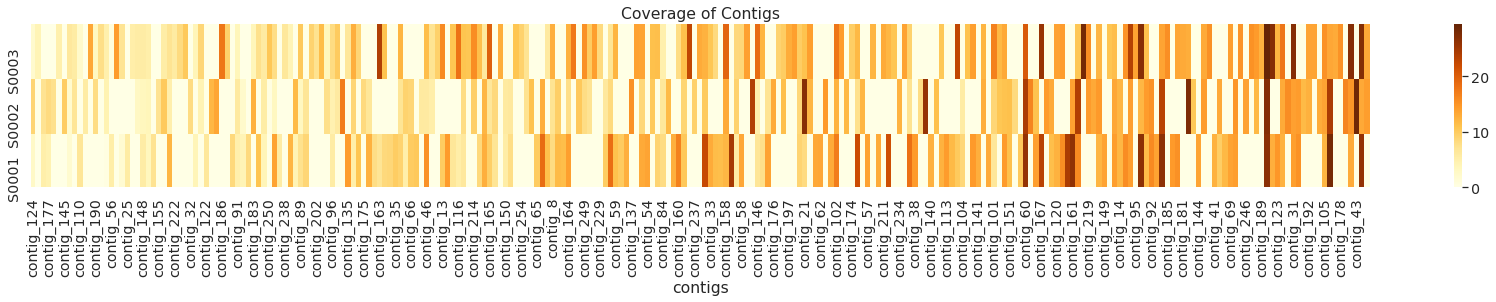

In [28]:
fig, ax = plt.subplots(figsize=(30,3))
sns.set(font_scale = 1.3)
ax = sns.heatmap(df_sorted, annot=False, cmap='YlOrBr')
ax.invert_yaxis()
ax.set_title('Coverage of Contigs')
plt.savefig(snakemake.output[0], dpi=400, bbox_inches = 'tight')